In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.python.keras import Model

from tensorflow.python.keras.layers import Input,Conv2D ,MaxPooling2D,Conv2DTranspose,Concatenate,Dropout


In [5]:
from google.colab import drive


In [6]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
ls

gdrive/  sample_data/


In [9]:
cd gdrive

/content/gdrive


In [10]:
ls

MyDrive/


In [12]:
cd MyDrive

/content/gdrive/MyDrive


In [14]:
cd projects

/content/gdrive/MyDrive/projects


In [15]:
ls

detection/  Untitled0.ipynb


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/Mydrive/projects'

In [22]:
os.getcwd()

'/content/gdrive/MyDrive/projects'

In [26]:
import os

# Klasör yolunu belirleme
folder_path = '/content/gdrive/My Drive/projects/detection'

# Klasördeki dosyaları listeleme
files = os.listdir(folder_path)

# Dosya listesini yazdırma
for file in files:
    print(file)


gerçekçi olmam lazım.txt
test
train


In [29]:
os.chdir(folder_path)

In [31]:
train_x = sorted(glob.glob('train/*_image.tif'))

In [32]:
train_x

['train/0_image.tif',
 'train/10_image.tif',
 'train/11_image.tif',
 'train/12_image.tif',
 'train/13_image.tif',
 'train/14_image.tif',
 'train/15_image.tif',
 'train/16_image.tif',
 'train/17_image.tif',
 'train/18_image.tif',
 'train/19_image.tif',
 'train/1_image.tif',
 'train/20_image.tif',
 'train/21_image.tif',
 'train/22_image.tif',
 'train/23_image.tif',
 'train/24_image.tif',
 'train/25_image.tif',
 'train/26_image.tif',
 'train/27_image.tif',
 'train/28_image.tif',
 'train/29_image.tif',
 'train/2_image.tif',
 'train/30_image.tif',
 'train/31_image.tif',
 'train/32_image.tif',
 'train/33_image.tif',
 'train/34_image.tif',
 'train/35_image.tif',
 'train/36_image.tif',
 'train/37_image.tif',
 'train/38_image.tif',
 'train/39_image.tif',
 'train/3_image.tif',
 'train/40_image.tif',
 'train/41_image.tif',
 'train/42_image.tif',
 'train/43_image.tif',
 'train/44_image.tif',
 'train/45_image.tif',
 'train/46_image.tif',
 'train/47_image.tif',
 'train/48_image.tif',
 'train/49_imag

In [33]:
train_y = sorted(glob.glob('train/*_label.tif'))

In [34]:
test_x = sorted(glob.glob('test/*_image.tif'))
test_y = sorted(glob.glob('test/*_label.tif'))

In [35]:
print(len(train_x),len(test_x))

70 30


In [47]:
train_xx=np.zeros((70,128,128,3))

In [48]:
train_yy=np.zeros((70,128,128,1))

In [49]:
for i,(img,mask) in enumerate(zip(train_x,train_y)):

  img=Image.open(img)
  np_img=np.array(img)
  train_xx[i]=np_img
  mask=Image.open(mask)
  np_mask=np.array(mask).reshape(128,128,1)
  train_yy[i]=np_mask

In [50]:
train_xx.shape

(70, 128, 128, 3)

In [51]:
train_yy.shape

(70, 128, 128, 1)

In [53]:
test_xx=np.zeros((30,128,128,3))
test_yy=np.zeros((30,128,128,1))

In [54]:
for i,(img,mask) in enumerate(zip(test_x,test_y)):
  img=Image.open(img)
  test_xx[i]=np_img

  mask=Image.open(mask)
  np_mask=np.array(mask).reshape(128,128,1)
  test_yy[i]=np_mask


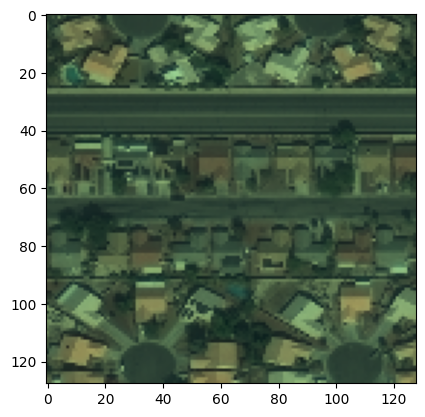

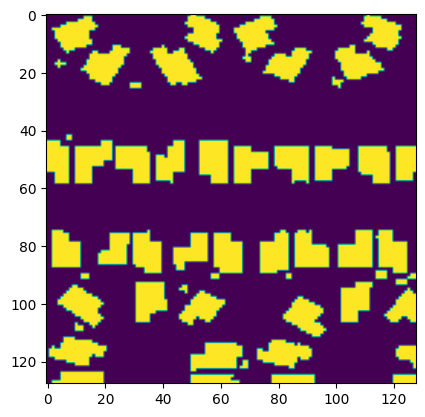

In [88]:
plt.imshow(train_xx[10].astype('uint8'))
plt.show()
plt.imshow(train_yy[10].astype('uint8'))

In [89]:
train_xx.shape


(70, 128, 128, 3)

In [90]:
test_xx.shape

(30, 128, 128, 3)

In [91]:
test_yy.shape

(30, 128, 128, 1)

In [92]:
train_yy.shape

(70, 128, 128, 1)

In [110]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X = np.concatenate((train_xx, test_xx), axis=0)
y = np.concatenate((train_yy, test_yy), axis=0)
train_xx, val_xx, train_yy, val_yy = train_test_split(X, y, test_size=0.3, random_state=42)


def unet(input_shape):
    inputs = Input(input_shape)

    # ENCODER

    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # DECODER
    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = Concatenate()([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = Concatenate()([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluşturma
input_shape = (128, 128, 3)
model = unet(input_shape)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(train_xx, train_yy, epochs=100, batch_size=8, validation_data=(val_xx, val_yy))


test_loss, test_acc = model.evaluate(test_xx, test_yy)
print(f'Test accuracy: {test_acc}')


Epoch 1/100
9/9 [==============================] - 8s 220ms/step - loss: 159.2504 - accuracy: 0.6145 - val_loss: 0.5708 - val_accuracy: 0.7781
Epoch 2/100
9/9 [==============================] - 1s 155ms/step - loss: 0.5890 - accuracy: 0.7725 - val_loss: 0.7011 - val_accuracy: 0.5347
Epoch 3/100
9/9 [==============================] - 2s 174ms/step - loss: 0.5801 - accuracy: 0.7421 - val_loss: 0.5385 - val_accuracy: 0.7806
Epoch 4/100
9/9 [==============================] - 2s 176ms/step - loss: 0.5485 - accuracy: 0.7782 - val_loss: 0.5265 - val_accuracy: 0.7829
Epoch 5/100
9/9 [==============================] - 2s 178ms/step - loss: 0.5183 - accuracy: 0.7839 - val_loss: 0.5157 - val_accuracy: 0.7845
Epoch 6/100
9/9 [==============================] - 2s 176ms/step - loss: 0.4945 - accuracy: 0.7974 - val_loss: 0.5057 - val_accuracy: 0.7853
Epoch 7/100
9/9 [==============================] - 1s 156ms/step - loss: 0.5037 - accuracy: 0.7906 - val_loss: 0.5269 - val_accuracy: 0.7958
Epoch 8/100

In [111]:
pred_test =model.predict(test_xx)

1/1 [==============================] - 0s 411ms/step


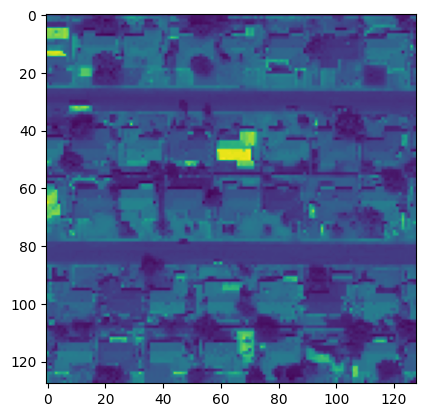

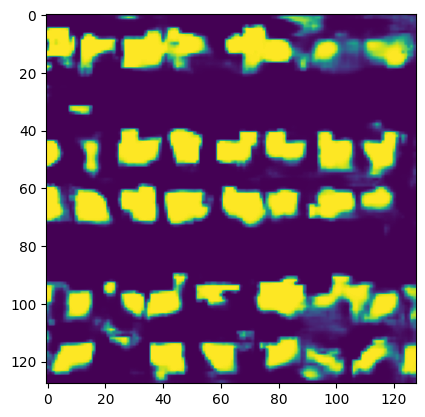

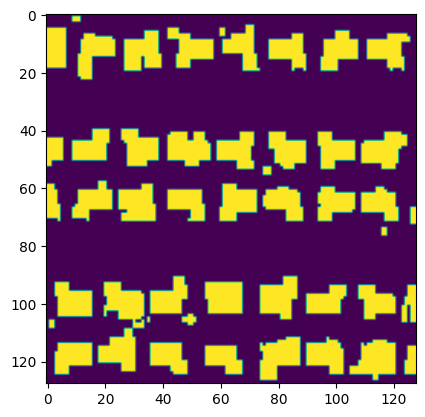

In [121]:
plt.imshow(test_xx[20,:,:,0])
plt.show()
plt.imshow(pred_test[20])
plt.show()
plt.imshow(test_yy[20])
plt.show()

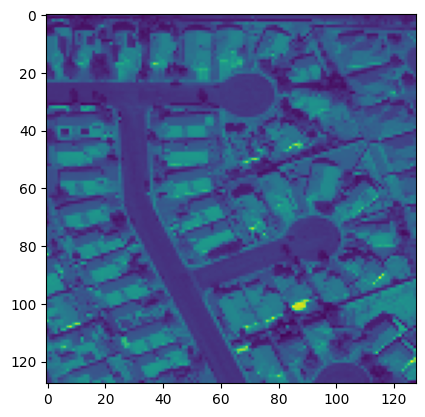

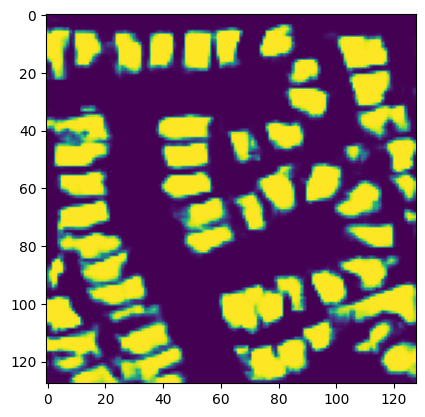

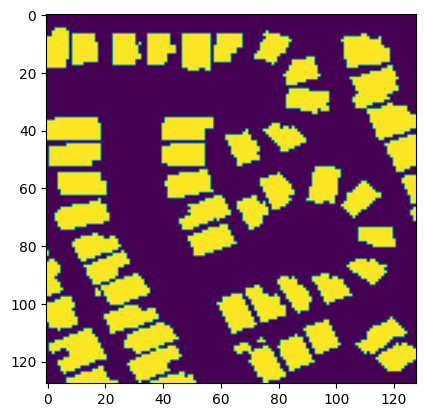

In [126]:
plt.imshow(test_xx[3,:,:,0])
plt.show()
plt.imshow(pred_test[3])
plt.show()
plt.imshow(test_yy[3])
plt.show()

In [ ]:
# different model  find from net.

In [107]:
x_in=Input(shape=(128,128,3))

x_temp=Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x_temp = Dropout(0.25)(x_temp)
x_skip1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip1)
x_temp = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip2)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip3)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)

'''Decoder'''
x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip3])
x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip2])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip1])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)

'''Use 1 by 1 Convolution to get desired output bands'''
x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_out = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x_temp)
# use sigmoid activation here because output values are either 0 or 1

model = Model(inputs=x_in, outputs=x_out)

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_47 (Conv2D)          (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 tf.identity_8 (TFOpLambda)  (None, 128, 128, 32)         0         ['conv2d_47[0][0]']           
                                                                                                  
 conv2d_48 (Conv2D)          (None, 128, 128, 32)         9248      ['tf.identity_8[0][0]']       
                                                                                            

In [108]:
history= model.fit(train_xx,train_yy,validation_data=(test_xx,test_yy),epochs=100,batch_size=10,verbose=1)

Epoch 1/100
7/7 [==============================] - 4s 102ms/step - loss: 0.2984 - accuracy: 0.6589 - val_loss: 0.1959 - val_accuracy: 0.7741
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 0.1977 - accuracy: 0.7604 - val_loss: 0.1806 - val_accuracy: 0.7776
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1842 - accuracy: 0.7674 - val_loss: 0.1646 - val_accuracy: 0.7903
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 0.1675 - accuracy: 0.7859 - val_loss: 0.1524 - val_accuracy: 0.8092
Epoch 5/100
7/7 [==============================] - 0s 40ms/step - loss: 0.1594 - accuracy: 0.7982 - val_loss: 0.1538 - val_accuracy: 0.8142
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.1639 - accuracy: 0.7966 - val_loss: 0.1466 - val_accuracy: 0.8197
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1616 - accuracy: 0.7961 - val_loss: 0.1489 - val_accuracy: 0.8166
Epoch 8/100
7/7 [==

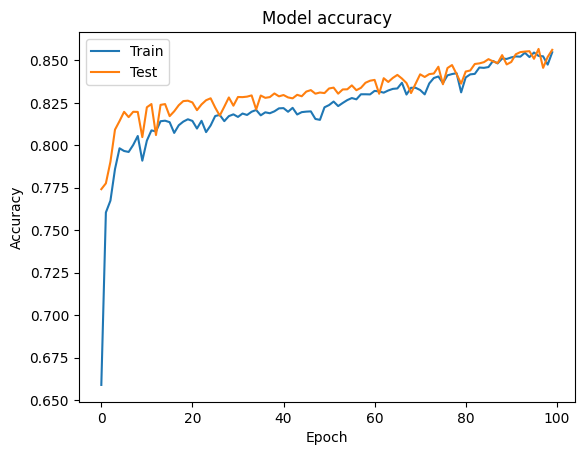

In [109]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [84]:
# model deployment

#U-net model

In [ ]:
# u-net modeli ilk kullandığım model daha iyi sonuç veriyor . 100 epochda 0.88 , diğeri 0.85 val_accuracy